In [28]:
import pandas as pd
import seaborn as sns
import numpy as np
from pathlib import Path
from tqdm.notebook import tqdm
from tqdm.notebook import tqdm
import numpy as np
import random

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, RocCurveDisplay, auc
from matplotlib import pyplot as plt

tqdm.pandas()


SEED = 254290

np.random.seed(SEED)
random.seed(SEED)

narysuj krzywe FAR,
FRR,
wyznacz EER
narysuj ROC


zmierz PSNR,
SSIM oraz BRISQUE.

In [29]:
registration_df = pd.read_csv("./data/registration.csv")
registration_df

,image,identity
0,050987.png,15
1,180629.png,97
2,108845.png,172
3,163175.png,229
4,165766.png,298
...,...,...
77,053384.png,9886
78,129996.png,10038
79,158237.png,10053
80,mac1.jpg,1


In [42]:
IMAGES_DIR = Path("./data/img")
# MODEL = "VGG-Face"
MODEL = "Facenet"

In [43]:
from users_db import UsersDB

db = UsersDB(model=MODEL)

for _, row in tqdm(registration_df.iterrows(), total=len(registration_df)):
    img_fpath = IMAGES_DIR / row["image"]
    db.add_record(row["identity"], img_fpath)

  0%|          | 0/82 [00:00<?, ?it/s]

Pomyślnie dodano nową osobe id_=15 :) 
Pomyślnie dodano nową osobe id_=97 :) 
Pomyślnie dodano nową osobe id_=172 :) 
Pomyślnie dodano nową osobe id_=229 :) 
Pomyślnie dodano nową osobe id_=298 :) 
Pomyślnie dodano nową osobe id_=303 :) 
Pomyślnie dodano nową osobe id_=478 :) 
Pomyślnie dodano nową osobe id_=612 :) 
Pomyślnie dodano nową osobe id_=736 :) 
Pomyślnie dodano nową osobe id_=871 :) 
Pomyślnie dodano nową osobe id_=898 :) 
Pomyślnie dodano nową osobe id_=902 :) 
Pomyślnie dodano nową osobe id_=910 :) 
Pomyślnie dodano nową osobe id_=1004 :) 
Pomyślnie dodano nową osobe id_=1051 :) 
Pomyślnie dodano nową osobe id_=1295 :) 
Pomyślnie dodano nową osobe id_=1308 :) 
Pomyślnie dodano nową osobe id_=1337 :) 
Pomyślnie dodano nową osobe id_=1433 :) 
Pomyślnie dodano nową osobe id_=1567 :) 
Pomyślnie dodano nową osobe id_=1663 :) 
Pomyślnie dodano nową osobe id_=1673 :) 
Pomyślnie dodano nową osobe id_=1824 :) 
Pomyślnie dodano nową osobe id_=2159 :) 
Pomyślnie dodano nową osobe id_

In [32]:
df1 = pd.read_csv("./data/df1.csv")
df1

,image,truth,identity
0,000010.png,False,229
1,000028.png,False,5841
2,000143.png,False,3984
3,000216.png,False,2729
4,000361.png,False,6997
...,...,...,...
1340,jed2.jpg,True,2
1341,mac3.jpg,True,1
1342,jed3.jpg,True,2
1343,mac4.jpg,True,1


In [33]:
df2 = pd.read_csv("./data/df2.csv")
df2

,image,truth,identity
0,000010.png,False,229
1,000028.png,False,5841
2,000143.png,False,3984
3,000216.png,False,2729
4,000361.png,False,6997
...,...,...,...
1440,069067.png,False,97
1441,198663.png,False,9433
1442,097141.png,False,1673
1443,107380.png,False,4896


In [34]:
df3 = pd.read_csv("./data/df3.csv")
df3

,image,truth,identity
0,000010.png,False,229
1,000028.png,False,5841
2,000143.png,False,3984
3,000216.png,False,2729
4,000361.png,False,6997
...,...,...,...
295,jed2.jpg,True,2
296,mac3.jpg,True,1
297,jed3.jpg,True,2
298,mac4.jpg,True,1


In [35]:
df4 = pd.read_csv("./data/df4.csv")
df4

,image,truth,identity
0,000010.png,False,229
1,000028.png,False,5841
2,000143.png,False,3984
3,000216.png,False,2729
4,000361.png,False,6997
...,...,...,...
295,jed2.jpg,True,2
296,mac3.jpg,True,1
297,jed3.jpg,True,2
298,mac4.jpg,True,1


In [44]:
# Define a function to calculate FAR
def calculate_far(df, threshold):
    # Count false acceptances
    false_acceptances = df[(df['authorized'] == True)&(df['truth'] == False)&(df['threshold'] == threshold)].shape[0]
    # Get the total number of identification attempts
    total_attempts = df[(df['truth'] == False)&(df['threshold'] == threshold)].shape[0]
    # Calculate FAR
    return false_acceptances / total_attempts


# Function to calculate FRR
def calculate_frr(dataframe, threshold):
    # Count false rejections
    false_rejections = dataframe[(dataframe['authorized'] == False) &(dataframe['truth'] == True)&(dataframe['threshold'] == threshold)].shape[0]
    # Get the total number of identification attempts by authorized users
    total_authorized_attempts = dataframe[(dataframe['truth'] == True)&(dataframe['threshold'] == threshold)].shape[0]
    # Calculate FRR
    if total_authorized_attempts == 0:
        return 0
        
    return false_rejections / total_authorized_attempts


# Function to calculate EER
def calculate_eer(far_values, frr_values, threshold_values):
    # Initialize the difference to a large number
    min_diff = float('inf')
    eer = 1
    eer_threshold = 0
    # Loop through all FAR and FRR values to find the EER
    for far, frr, threshold in zip(far_values, frr_values, threshold_values):
        # Calculate the absolute difference between FAR and FRR
        diff = abs(far - frr)
        # If this is the smallest difference we've found, update the EER values
        if diff < min_diff:
            min_diff = diff
            eer = (far + frr) / 2  # Take the average to get EER when FAR is close to FRR
            eer_threshold = threshold
    return eer, eer_threshold


def run_exp(df, threshold_values, dataset_name="Dataset ##"):
    auth_history = []
    for threshold in tqdm(threshold_values, desc="Exp Thresholds"):
        for _, row in df.iterrows():
            img_fpath = IMAGES_DIR / row["image"]
            print(img_fpath)
            distance, authorized = db.verify_user(img_fpath, row["identity"], threshold=threshold, cache=True)
            auth_history.append({
                "image": row["image"],
                "identity": row["identity"],
                "authorized": authorized,
                "truth": row["truth"],
                "distance": distance,
                "threshold": threshold,
            })

    auth_history_df = pd.DataFrame.from_records(auth_history)

    threshold_metrics = []
    for threshold in threshold_values:
        threshold_metrics.append({
            "threshold": threshold,
            "far": calculate_far(auth_history_df, threshold),
            "frr": calculate_frr(auth_history_df, threshold),
        })

    threshold_metrics_df = pd.DataFrame.from_records(threshold_metrics)
    eer, eer_threshold = calculate_eer(threshold_metrics_df["far"].values, threshold_metrics_df["frr"].values, threshold_values)

    threshold_auth_history_df = auth_history_df[auth_history_df["threshold"] == eer_threshold]

    cm = confusion_matrix(df["truth"].values, threshold_auth_history_df["authorized"].tolist())
    # tn, fp, fn, tp = cm.ravel()

    report = classification_report(df["truth"].tolist(), threshold_auth_history_df["authorized"].tolist())
    print(report)

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

    sns.lineplot(
        data=threshold_metrics_df,
        x="threshold",
        y="far",
        marker=".",
        label="FAR (False Acceptance Rate)",
        zorder=1,
        ax=axes[0],
    )
    sns.lineplot(
        data=threshold_metrics_df,
        x="threshold",
        y="frr",
        marker=".",
        label="FRR (False Rejection Rate)",
        zorder=1,
        ax=axes[0],
    )
    sns.scatterplot(
        x=[eer_threshold],
        y=[eer],
        color="red",
        label=f"EER = {eer:.2f} (threshold={eer_threshold:.2f})",
        zorder=2,
        ax=axes[0]
    )
    axes[0].set_xlabel("Threshold")
    axes[0].set_ylabel("Rate")
    axes[0].grid(alpha=0.2)
    # plt.show()

    sns.heatmap(cm, annot=True, ax=axes[1], fmt='d', cmap="Blues")
    axes[1].set_title(f"Confusion Matrix ({eer_threshold=:.2f})")
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("Actual")
    # plt.show()

    fpr, tpr, thresholds = roc_curve(df["truth"].values, threshold_auth_history_df["distance"].values)
    roc_auc = auc(fpr, tpr)
    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot(ax=axes[2])
    axes[2].set_title(f"ROC Curve")
    # plt.show()

    fig.suptitle(f"{dataset_name}    Threshold: {eer_threshold:.2f} (EER)\n")
    fig.savefig(f"./plots/exp__{dataset_name}.png")
    fig.show()


In [45]:
THRESHOLD_VALUES = np.linspace(0.1, 0.8, 10)

In [46]:
run_exp(df1, THRESHOLD_VALUES, dataset_name=f"Dataset #1")

Exp Thresholds:   0%|          | 0/10 [00:00<?, ?it/s]

data/img/000010.png


KeyError: '000010.png'

Exp Thresholds:   0%|          | 0/10 [00:00<?, ?it/s]

              precision    recall  f1-score   support

       False       0.88      0.93      0.90       769
        True       0.91      0.86      0.88       676

    accuracy                           0.89      1445
   macro avg       0.90      0.89      0.89      1445
weighted avg       0.90      0.89      0.89      1445



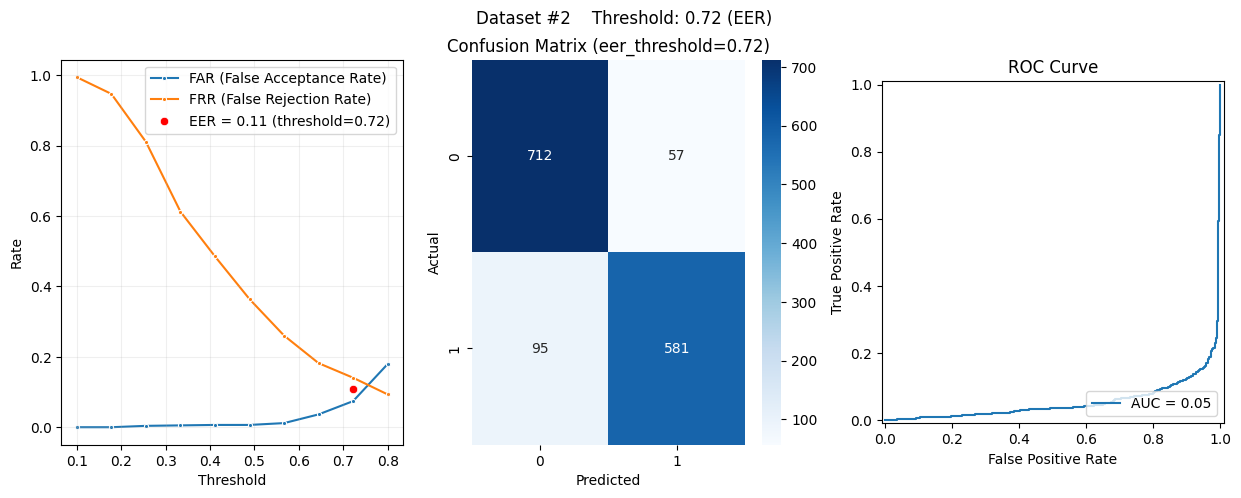

In [ ]:
run_exp(df2, THRESHOLD_VALUES, dataset_name=f"Dataset #2")

In [ ]:
IMAGES_DIR = Path("./data")

In [ ]:
# Define a function to calculate FAR
def calculate_far(df, threshold):
    # Count false acceptances
    false_acceptances = df[(df['authorized'] == True)&(df['truth'] == False)&(df['threshold'] == threshold)].shape[0]
    # Get the total number of identification attempts
    total_attempts = df[(df['truth'] == False)&(df['threshold'] == threshold)].shape[0]
    # Calculate FAR
    return false_acceptances / total_attempts


# Function to calculate FRR
def calculate_frr(dataframe, threshold):
    # Count false rejections
    false_rejections = dataframe[(dataframe['authorized'] == False) &(dataframe['truth'] == True)&(dataframe['threshold'] == threshold)].shape[0]
    # Get the total number of identification attempts by authorized users
    total_authorized_attempts = dataframe[(dataframe['truth'] == True)&(dataframe['threshold'] == threshold)].shape[0]
    # Calculate FRR
    if total_authorized_attempts == 0:
        return 0
        
    return false_rejections / total_authorized_attempts


# Function to calculate EER
def calculate_eer(far_values, frr_values, threshold_values):
    # Initialize the difference to a large number
    min_diff = float('inf')
    eer = 1
    eer_threshold = 0
    # Loop through all FAR and FRR values to find the EER
    for far, frr, threshold in zip(far_values, frr_values, threshold_values):
        # Calculate the absolute difference between FAR and FRR
        diff = abs(far - frr)
        # If this is the smallest difference we've found, update the EER values
        if diff < min_diff:
            min_diff = diff
            eer = (far + frr) / 2  # Take the average to get EER when FAR is close to FRR
            eer_threshold = threshold
    return eer, eer_threshold


def run_exp(df, threshold_values, dataset_name="Dataset ##"):
    auth_history = []
    for threshold in tqdm(threshold_values, desc="Exp Thresholds"):
        for _, row in df.iterrows():
            img_fpath = IMAGES_DIR / row["image"]
            print(img_fpath)
            distance, authorized = db.verify_user(img_fpath, row["identity"], threshold=threshold, cache=True)
            auth_history.append({
                "image": row["image"],
                "identity": row["identity"],
                "authorized": authorized,
                "truth": row["truth"],
                "distance": distance,
                "threshold": threshold,
            })

    auth_history_df = pd.DataFrame.from_records(auth_history)

    threshold_metrics = []
    for threshold in threshold_values:
        threshold_metrics.append({
            "threshold": threshold,
            "far": calculate_far(auth_history_df, threshold),
            "frr": calculate_frr(auth_history_df, threshold),
        })

    threshold_metrics_df = pd.DataFrame.from_records(threshold_metrics)
    eer, eer_threshold = calculate_eer(threshold_metrics_df["far"].values, threshold_metrics_df["frr"].values, threshold_values)

    threshold_auth_history_df = auth_history_df[auth_history_df["threshold"] == eer_threshold]

    cm = confusion_matrix(df["truth"].values, threshold_auth_history_df["authorized"].tolist())
    # tn, fp, fn, tp = cm.ravel()

    report = classification_report(df["truth"].tolist(), threshold_auth_history_df["authorized"].tolist())
    print(report)

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

    sns.lineplot(
        data=threshold_metrics_df,
        x="threshold",
        y="far",
        marker=".",
        label="FAR (False Acceptance Rate)",
        zorder=1,
        ax=axes[0],
    )
    sns.lineplot(
        data=threshold_metrics_df,
        x="threshold",
        y="frr",
        marker=".",
        label="FRR (False Rejection Rate)",
        zorder=1,
        ax=axes[0],
    )
    sns.scatterplot(
        x=[eer_threshold],
        y=[eer],
        color="red",
        label=f"EER = {eer:.2f} (threshold={eer_threshold:.2f})",
        zorder=2,
        ax=axes[0]
    )
    axes[0].set_xlabel("Threshold")
    axes[0].set_ylabel("Rate")
    axes[0].grid(alpha=0.2)
    # plt.show()

    sns.heatmap(cm, annot=True, ax=axes[1], fmt='d', cmap="Blues")
    axes[1].set_title(f"Confusion Matrix ({eer_threshold=:.2f})")
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("Actual")
    # plt.show()

    fpr, tpr, thresholds = roc_curve(df["truth"].values, threshold_auth_history_df["distance"].values)
    roc_auc = auc(fpr, tpr)
    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot(ax=axes[2])
    axes[2].set_title(f"ROC Curve")
    # plt.show()

    fig.suptitle(f"{dataset_name}    Threshold: {eer_threshold:.2f} (EER)\n")
    fig.savefig(f"./plots/exp__{dataset_name}.png")
    fig.show()


Exp Thresholds:   0%|          | 0/10 [00:00<?, ?it/s]

              precision    recall  f1-score   support

       False       0.87      0.83      0.85       150
        True       0.84      0.88      0.86       150

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



Exp Thresholds:   0%|          | 0/10 [00:00<?, ?it/s]

              precision    recall  f1-score   support

       False       0.87      0.83      0.85       150
        True       0.84      0.88      0.86       150

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



Exp Thresholds:   0%|          | 0/10 [00:00<?, ?it/s]

              precision    recall  f1-score   support

       False       0.87      0.83      0.85       150
        True       0.84      0.88      0.86       150

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



Exp Thresholds:   0%|          | 0/10 [00:00<?, ?it/s]

              precision    recall  f1-score   support

       False       0.87      0.83      0.85       150
        True       0.84      0.88      0.86       150

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



Exp Thresholds:   0%|          | 0/10 [00:00<?, ?it/s]

              precision    recall  f1-score   support

       False       0.87      0.83      0.85       150
        True       0.84      0.88      0.86       150

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



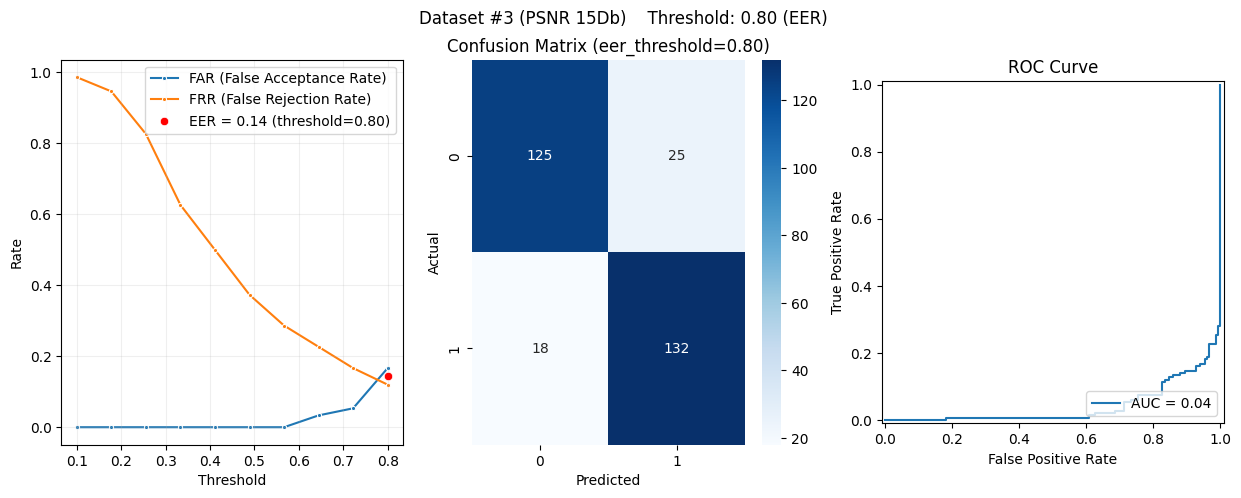

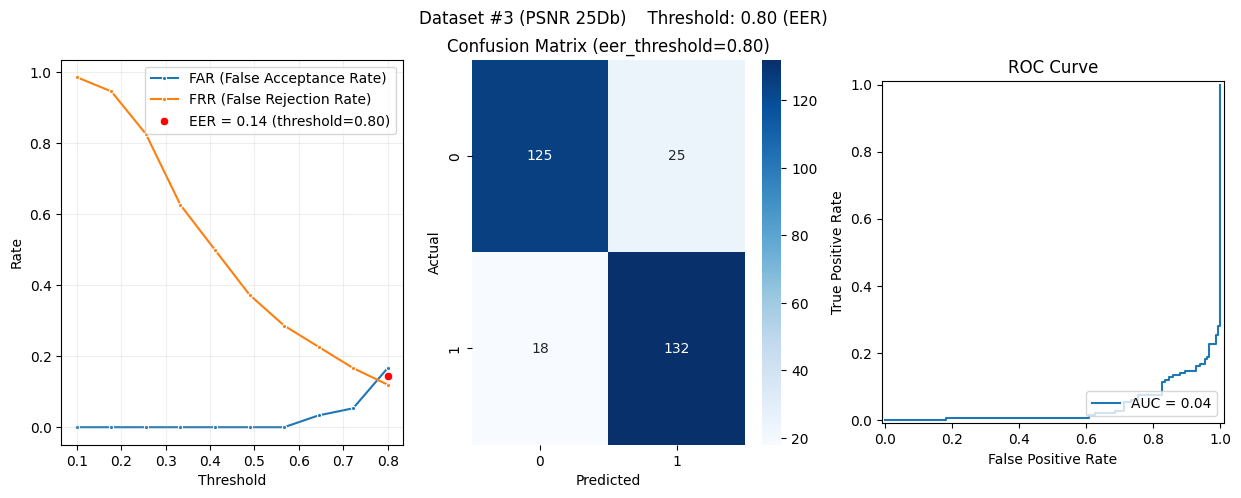

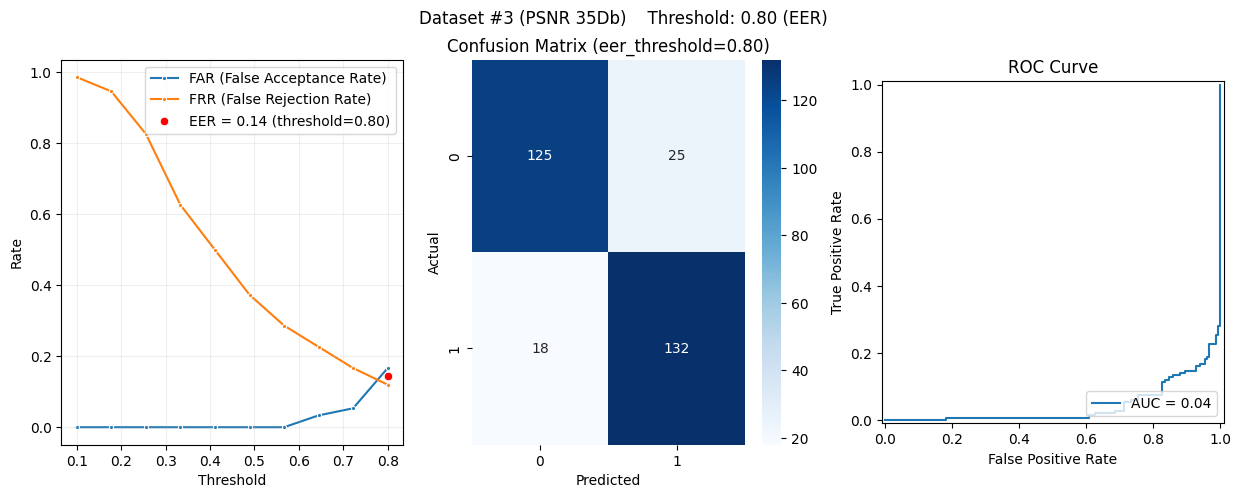

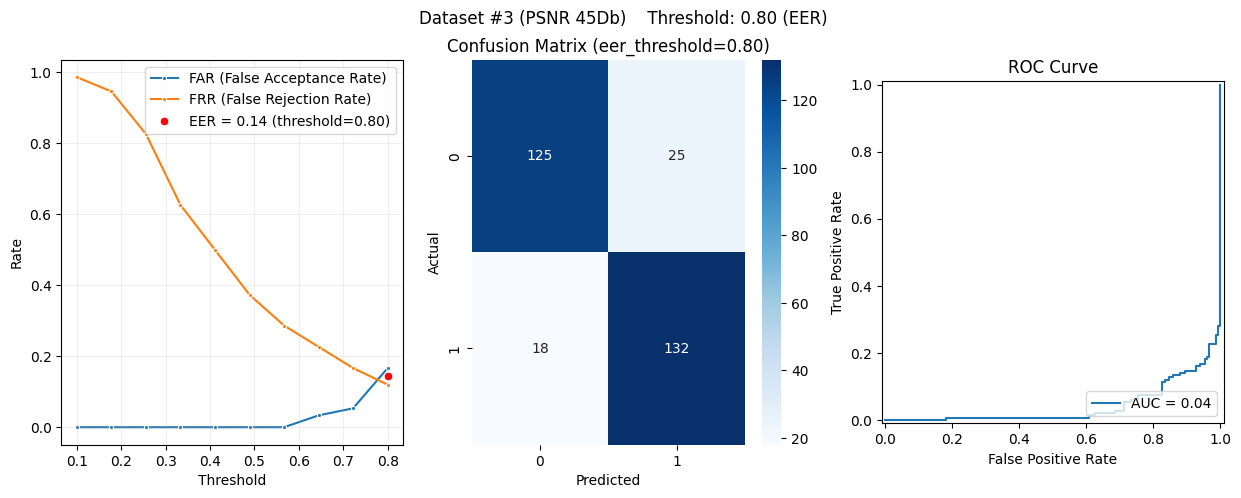

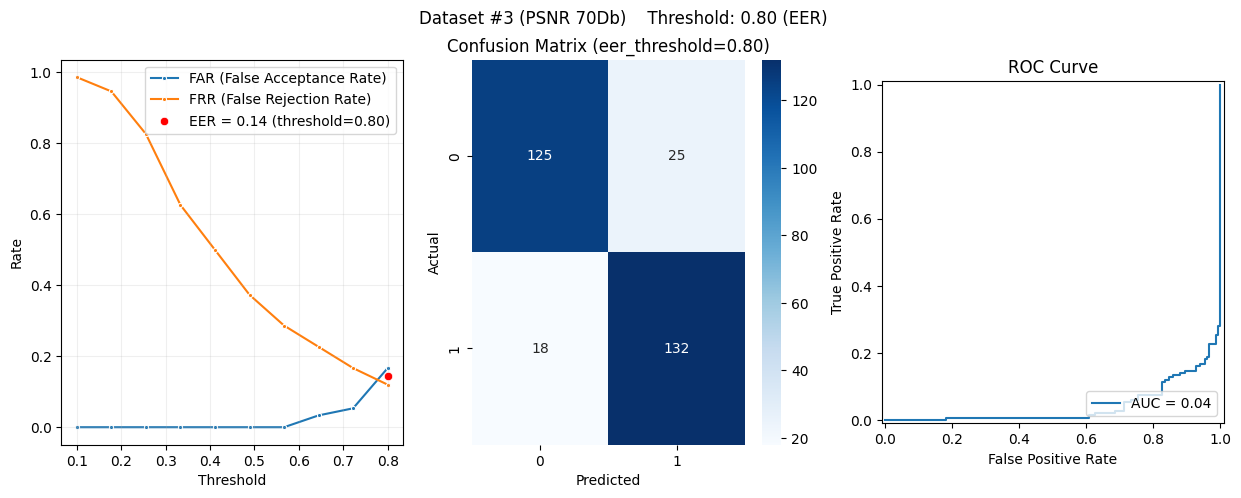

In [15]:
psnr_values = [15, 25, 35, 45, 70]
for psnr in psnr_values:
    df3_wth_fixed_paths = df3.copy()
    df3_wth_fixed_paths["image"] = df3_wth_fixed_paths["image"].apply(lambda x: f"df3_psnr{psnr}db/" + x)
    run_exp(df3_wth_fixed_paths, THRESHOLD_VALUES, dataset_name=f"Dataset #3 (PSNR {psnr}Db)")

In [18]:
df3_wth_fixed_paths

,image,truth,identity
0,df4_luminance_quad/000010.png,False,229
1,df4_luminance_quad/000028.png,False,5841
2,df4_luminance_quad/000143.png,False,3984
3,df4_luminance_quad/000216.png,False,2729
4,df4_luminance_quad/000361.png,False,6997
...,...,...,...
295,df4_luminance_quad/jed2.jpg,True,2
296,df4_luminance_quad/mac3.jpg,True,1
297,df4_luminance_quad/jed3.jpg,True,2
298,df4_luminance_quad/mac4.jpg,True,1


Exp Thresholds:   0%|          | 0/10 [00:00<?, ?it/s]

data/df4_luminance_const_30/000010.png
data/df4_luminance_const_30/000028.png
data/df4_luminance_const_30/000143.png
data/df4_luminance_const_30/000216.png
data/df4_luminance_const_30/000361.png
data/df4_luminance_const_30/000493.png
data/df4_luminance_const_30/000499.png
data/df4_luminance_const_30/000550.png
data/df4_luminance_const_30/000583.png
data/df4_luminance_const_30/000600.png
data/df4_luminance_const_30/000898.png
data/df4_luminance_const_30/000911.png
data/df4_luminance_const_30/001148.png
data/df4_luminance_const_30/001358.png
data/df4_luminance_const_30/001590.png
data/df4_luminance_const_30/001668.png
data/df4_luminance_const_30/002326.png
data/df4_luminance_const_30/002525.png
data/df4_luminance_const_30/002551.png
data/df4_luminance_const_30/002563.png
data/df4_luminance_const_30/002760.png
data/df4_luminance_const_30/003086.png
data/df4_luminance_const_30/003158.png
data/df4_luminance_const_30/003403.png
data/df4_luminance_const_30/003448.png
data/df4_luminance_const_

Exp Thresholds:   0%|          | 0/10 [00:00<?, ?it/s]

data/df4_luminance_const_neg10/000010.png
data/df4_luminance_const_neg10/000028.png
data/df4_luminance_const_neg10/000143.png
data/df4_luminance_const_neg10/000216.png
data/df4_luminance_const_neg10/000361.png
data/df4_luminance_const_neg10/000493.png
data/df4_luminance_const_neg10/000499.png
data/df4_luminance_const_neg10/000550.png
data/df4_luminance_const_neg10/000583.png
data/df4_luminance_const_neg10/000600.png
data/df4_luminance_const_neg10/000898.png
data/df4_luminance_const_neg10/000911.png
data/df4_luminance_const_neg10/001148.png
data/df4_luminance_const_neg10/001358.png
data/df4_luminance_const_neg10/001590.png
data/df4_luminance_const_neg10/001668.png
data/df4_luminance_const_neg10/002326.png
data/df4_luminance_const_neg10/002525.png
data/df4_luminance_const_neg10/002551.png
data/df4_luminance_const_neg10/002563.png
data/df4_luminance_const_neg10/002760.png
data/df4_luminance_const_neg10/003086.png
data/df4_luminance_const_neg10/003158.png
data/df4_luminance_const_neg10/003

Exp Thresholds:   0%|          | 0/10 [00:00<?, ?it/s]

data/df4_luminance_const_neg20/000010.png
data/df4_luminance_const_neg20/000028.png
data/df4_luminance_const_neg20/000143.png
data/df4_luminance_const_neg20/000216.png
data/df4_luminance_const_neg20/000361.png
data/df4_luminance_const_neg20/000493.png
data/df4_luminance_const_neg20/000499.png
data/df4_luminance_const_neg20/000550.png
data/df4_luminance_const_neg20/000583.png
data/df4_luminance_const_neg20/000600.png
data/df4_luminance_const_neg20/000898.png
data/df4_luminance_const_neg20/000911.png
data/df4_luminance_const_neg20/001148.png
data/df4_luminance_const_neg20/001358.png
data/df4_luminance_const_neg20/001590.png
data/df4_luminance_const_neg20/001668.png
data/df4_luminance_const_neg20/002326.png
data/df4_luminance_const_neg20/002525.png
data/df4_luminance_const_neg20/002551.png
data/df4_luminance_const_neg20/002563.png
data/df4_luminance_const_neg20/002760.png
data/df4_luminance_const_neg20/003086.png
data/df4_luminance_const_neg20/003158.png
data/df4_luminance_const_neg20/003

Exp Thresholds:   0%|          | 0/10 [00:00<?, ?it/s]

data/df4_luminance_const_neg100/000010.png
data/df4_luminance_const_neg100/000028.png
data/df4_luminance_const_neg100/000143.png
data/df4_luminance_const_neg100/000216.png
data/df4_luminance_const_neg100/000361.png
data/df4_luminance_const_neg100/000493.png
data/df4_luminance_const_neg100/000499.png
data/df4_luminance_const_neg100/000550.png
data/df4_luminance_const_neg100/000583.png
data/df4_luminance_const_neg100/000600.png
data/df4_luminance_const_neg100/000898.png
data/df4_luminance_const_neg100/000911.png
data/df4_luminance_const_neg100/001148.png
data/df4_luminance_const_neg100/001358.png
data/df4_luminance_const_neg100/001590.png
data/df4_luminance_const_neg100/001668.png
data/df4_luminance_const_neg100/002326.png
data/df4_luminance_const_neg100/002525.png
data/df4_luminance_const_neg100/002551.png
data/df4_luminance_const_neg100/002563.png
data/df4_luminance_const_neg100/002760.png
data/df4_luminance_const_neg100/003086.png
data/df4_luminance_const_neg100/003158.png
data/df4_lu

Exp Thresholds:   0%|          | 0/10 [00:00<?, ?it/s]

data/df4_luminance_linear_0f5/000010.png
data/df4_luminance_linear_0f5/000028.png
data/df4_luminance_linear_0f5/000143.png
data/df4_luminance_linear_0f5/000216.png
data/df4_luminance_linear_0f5/000361.png
data/df4_luminance_linear_0f5/000493.png
data/df4_luminance_linear_0f5/000499.png
data/df4_luminance_linear_0f5/000550.png
data/df4_luminance_linear_0f5/000583.png
data/df4_luminance_linear_0f5/000600.png
data/df4_luminance_linear_0f5/000898.png
data/df4_luminance_linear_0f5/000911.png
data/df4_luminance_linear_0f5/001148.png
data/df4_luminance_linear_0f5/001358.png
data/df4_luminance_linear_0f5/001590.png
data/df4_luminance_linear_0f5/001668.png
data/df4_luminance_linear_0f5/002326.png
data/df4_luminance_linear_0f5/002525.png
data/df4_luminance_linear_0f5/002551.png
data/df4_luminance_linear_0f5/002563.png
data/df4_luminance_linear_0f5/002760.png
data/df4_luminance_linear_0f5/003086.png
data/df4_luminance_linear_0f5/003158.png
data/df4_luminance_linear_0f5/003403.png
data/df4_luminan

Exp Thresholds:   0%|          | 0/10 [00:00<?, ?it/s]

data/df4_luminance_linear_0f6/000010.png
data/df4_luminance_linear_0f6/000028.png
data/df4_luminance_linear_0f6/000143.png
data/df4_luminance_linear_0f6/000216.png
data/df4_luminance_linear_0f6/000361.png
data/df4_luminance_linear_0f6/000493.png
data/df4_luminance_linear_0f6/000499.png
data/df4_luminance_linear_0f6/000550.png
data/df4_luminance_linear_0f6/000583.png
data/df4_luminance_linear_0f6/000600.png
data/df4_luminance_linear_0f6/000898.png
data/df4_luminance_linear_0f6/000911.png
data/df4_luminance_linear_0f6/001148.png
data/df4_luminance_linear_0f6/001358.png
data/df4_luminance_linear_0f6/001590.png
data/df4_luminance_linear_0f6/001668.png
data/df4_luminance_linear_0f6/002326.png
data/df4_luminance_linear_0f6/002525.png
data/df4_luminance_linear_0f6/002551.png
data/df4_luminance_linear_0f6/002563.png
data/df4_luminance_linear_0f6/002760.png
data/df4_luminance_linear_0f6/003086.png
data/df4_luminance_linear_0f6/003158.png
data/df4_luminance_linear_0f6/003403.png
data/df4_luminan

Exp Thresholds:   0%|          | 0/10 [00:00<?, ?it/s]

data/df4_luminance_linear_0f75/000010.png
data/df4_luminance_linear_0f75/000028.png
data/df4_luminance_linear_0f75/000143.png
data/df4_luminance_linear_0f75/000216.png
data/df4_luminance_linear_0f75/000361.png
data/df4_luminance_linear_0f75/000493.png
data/df4_luminance_linear_0f75/000499.png
data/df4_luminance_linear_0f75/000550.png
data/df4_luminance_linear_0f75/000583.png
data/df4_luminance_linear_0f75/000600.png
data/df4_luminance_linear_0f75/000898.png
data/df4_luminance_linear_0f75/000911.png
data/df4_luminance_linear_0f75/001148.png
data/df4_luminance_linear_0f75/001358.png
data/df4_luminance_linear_0f75/001590.png
data/df4_luminance_linear_0f75/001668.png
data/df4_luminance_linear_0f75/002326.png
data/df4_luminance_linear_0f75/002525.png
data/df4_luminance_linear_0f75/002551.png
data/df4_luminance_linear_0f75/002563.png
data/df4_luminance_linear_0f75/002760.png
data/df4_luminance_linear_0f75/003086.png
data/df4_luminance_linear_0f75/003158.png
data/df4_luminance_linear_0f75/003

Exp Thresholds:   0%|          | 0/10 [00:00<?, ?it/s]

data/df4_luminance_linear_1f5/000010.png
data/df4_luminance_linear_1f5/000028.png
data/df4_luminance_linear_1f5/000143.png
data/df4_luminance_linear_1f5/000216.png
data/df4_luminance_linear_1f5/000361.png
data/df4_luminance_linear_1f5/000493.png
data/df4_luminance_linear_1f5/000499.png
data/df4_luminance_linear_1f5/000550.png
data/df4_luminance_linear_1f5/000583.png
data/df4_luminance_linear_1f5/000600.png
data/df4_luminance_linear_1f5/000898.png
data/df4_luminance_linear_1f5/000911.png
data/df4_luminance_linear_1f5/001148.png
data/df4_luminance_linear_1f5/001358.png
data/df4_luminance_linear_1f5/001590.png
data/df4_luminance_linear_1f5/001668.png
data/df4_luminance_linear_1f5/002326.png
data/df4_luminance_linear_1f5/002525.png
data/df4_luminance_linear_1f5/002551.png
data/df4_luminance_linear_1f5/002563.png
data/df4_luminance_linear_1f5/002760.png
data/df4_luminance_linear_1f5/003086.png
data/df4_luminance_linear_1f5/003158.png
data/df4_luminance_linear_1f5/003403.png
data/df4_luminan

Exp Thresholds:   0%|          | 0/10 [00:00<?, ?it/s]

data/df4_luminance_linear_1f33/000010.png
data/df4_luminance_linear_1f33/000028.png
data/df4_luminance_linear_1f33/000143.png
data/df4_luminance_linear_1f33/000216.png
data/df4_luminance_linear_1f33/000361.png
data/df4_luminance_linear_1f33/000493.png
data/df4_luminance_linear_1f33/000499.png
data/df4_luminance_linear_1f33/000550.png
data/df4_luminance_linear_1f33/000583.png
data/df4_luminance_linear_1f33/000600.png
data/df4_luminance_linear_1f33/000898.png
data/df4_luminance_linear_1f33/000911.png
data/df4_luminance_linear_1f33/001148.png
data/df4_luminance_linear_1f33/001358.png
data/df4_luminance_linear_1f33/001590.png
data/df4_luminance_linear_1f33/001668.png
data/df4_luminance_linear_1f33/002326.png
data/df4_luminance_linear_1f33/002525.png
data/df4_luminance_linear_1f33/002551.png
data/df4_luminance_linear_1f33/002563.png
data/df4_luminance_linear_1f33/002760.png
data/df4_luminance_linear_1f33/003086.png
data/df4_luminance_linear_1f33/003158.png
data/df4_luminance_linear_1f33/003

Exp Thresholds:   0%|          | 0/10 [00:00<?, ?it/s]

data/df4_luminance_quad/000010.png
data/df4_luminance_quad/000028.png
data/df4_luminance_quad/000143.png
data/df4_luminance_quad/000216.png
data/df4_luminance_quad/000361.png
data/df4_luminance_quad/000493.png
data/df4_luminance_quad/000499.png
data/df4_luminance_quad/000550.png
data/df4_luminance_quad/000583.png
data/df4_luminance_quad/000600.png
data/df4_luminance_quad/000898.png
data/df4_luminance_quad/000911.png
data/df4_luminance_quad/001148.png
data/df4_luminance_quad/001358.png
data/df4_luminance_quad/001590.png
data/df4_luminance_quad/001668.png
data/df4_luminance_quad/002326.png
data/df4_luminance_quad/002525.png
data/df4_luminance_quad/002551.png
data/df4_luminance_quad/002563.png
data/df4_luminance_quad/002760.png
data/df4_luminance_quad/003086.png
data/df4_luminance_quad/003158.png
data/df4_luminance_quad/003403.png
data/df4_luminance_quad/003448.png
data/df4_luminance_quad/003491.png
data/df4_luminance_quad/003513.png
data/df4_luminance_quad/003748.png
data/df4_luminance_q

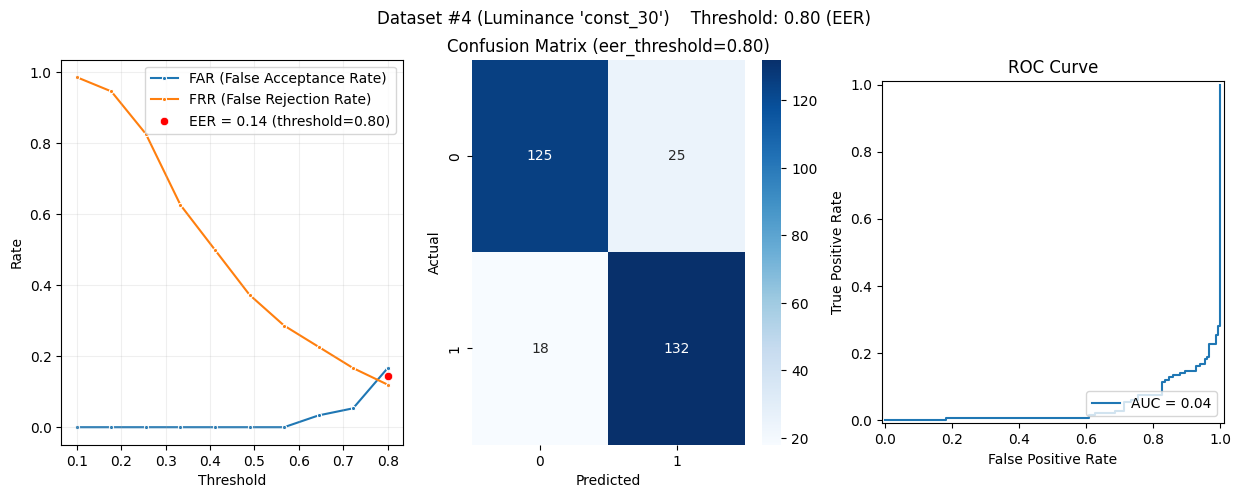

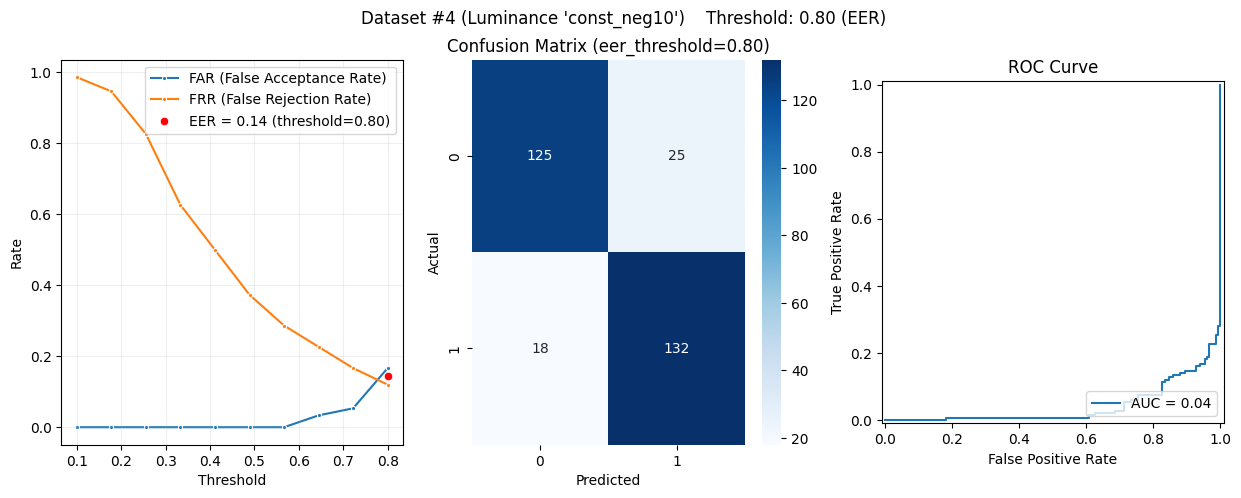

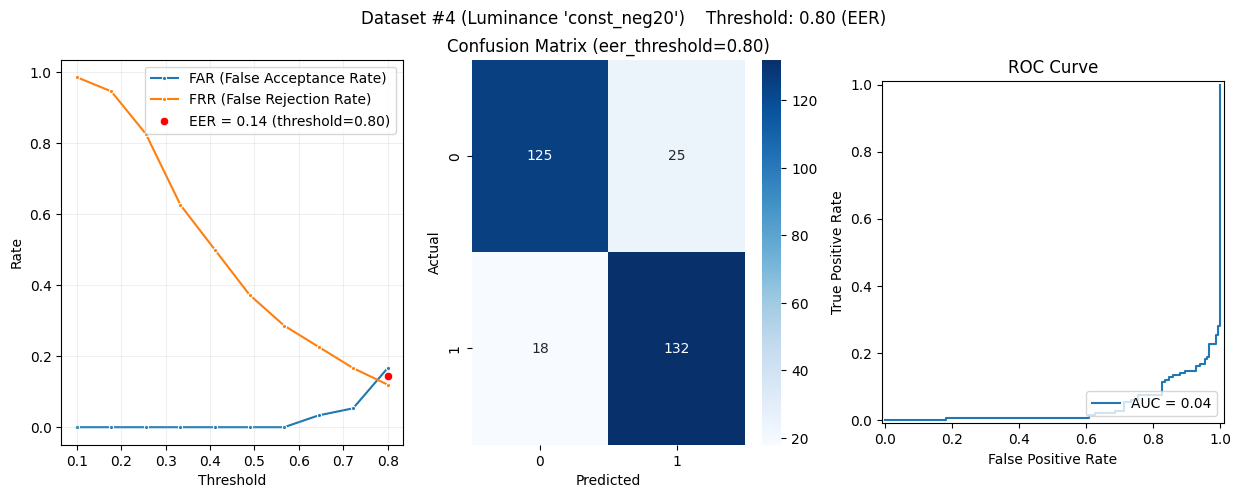

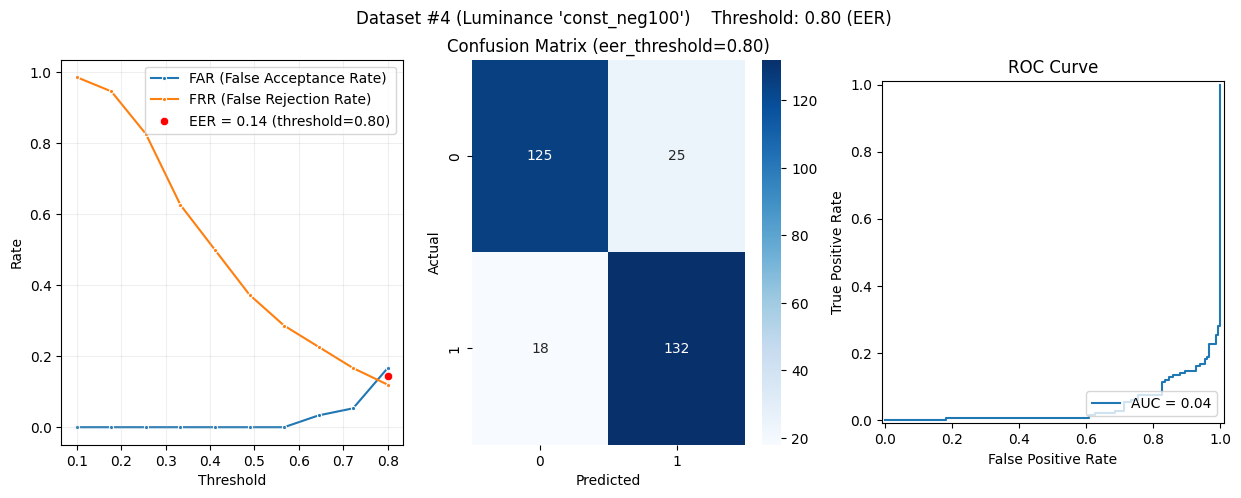

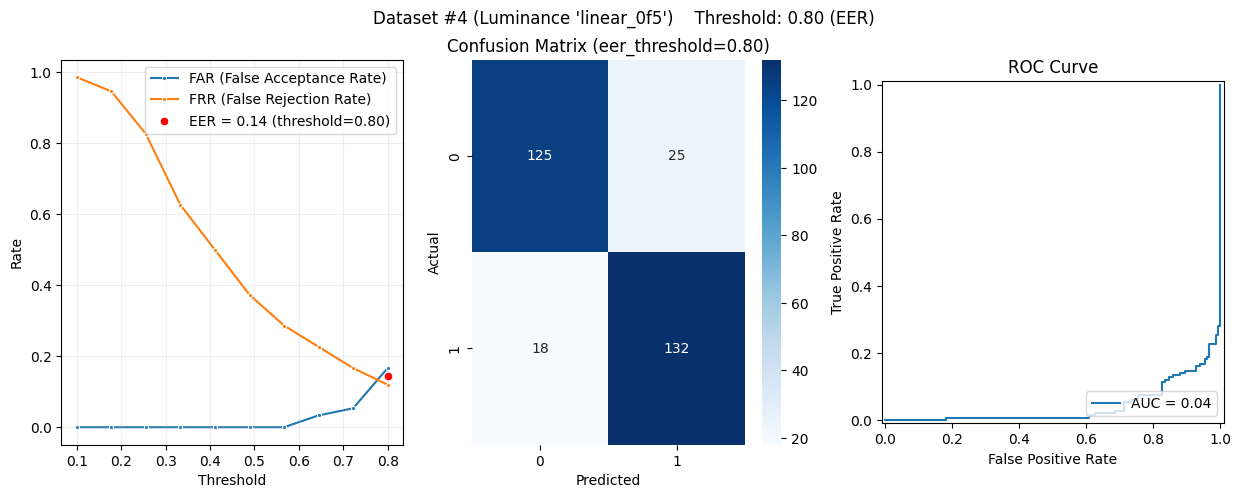

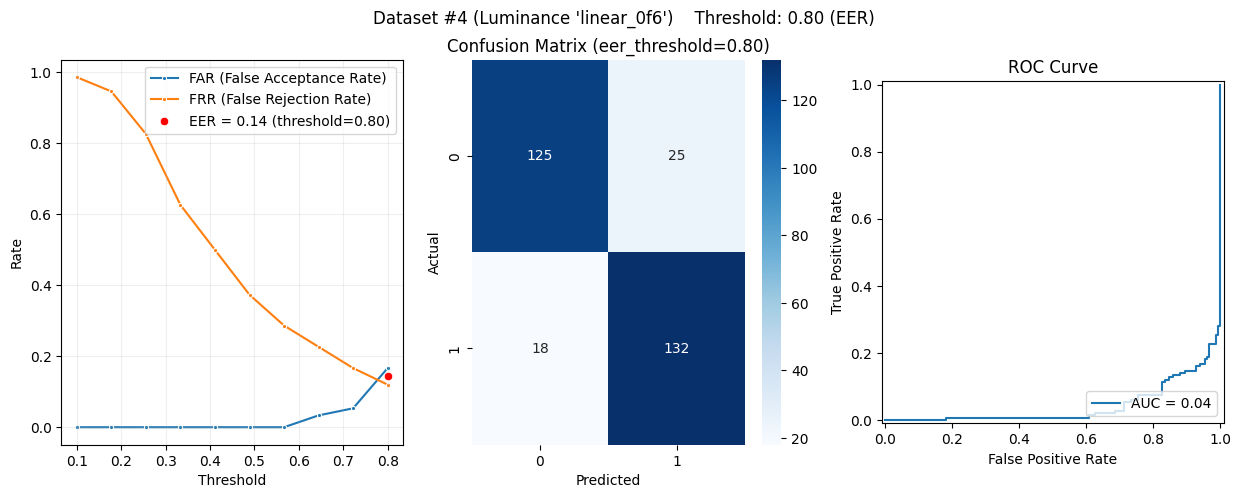

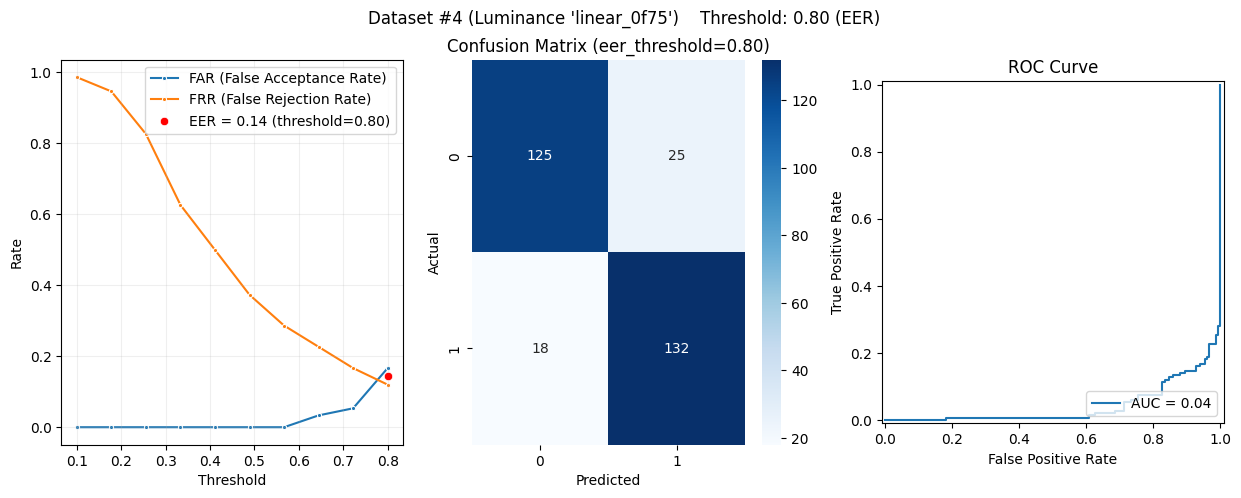

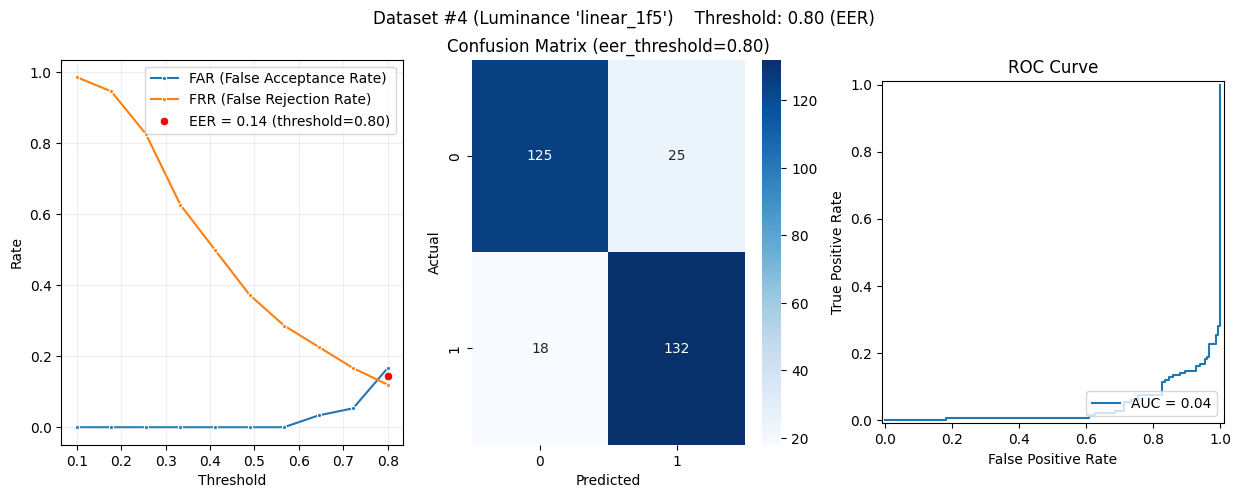

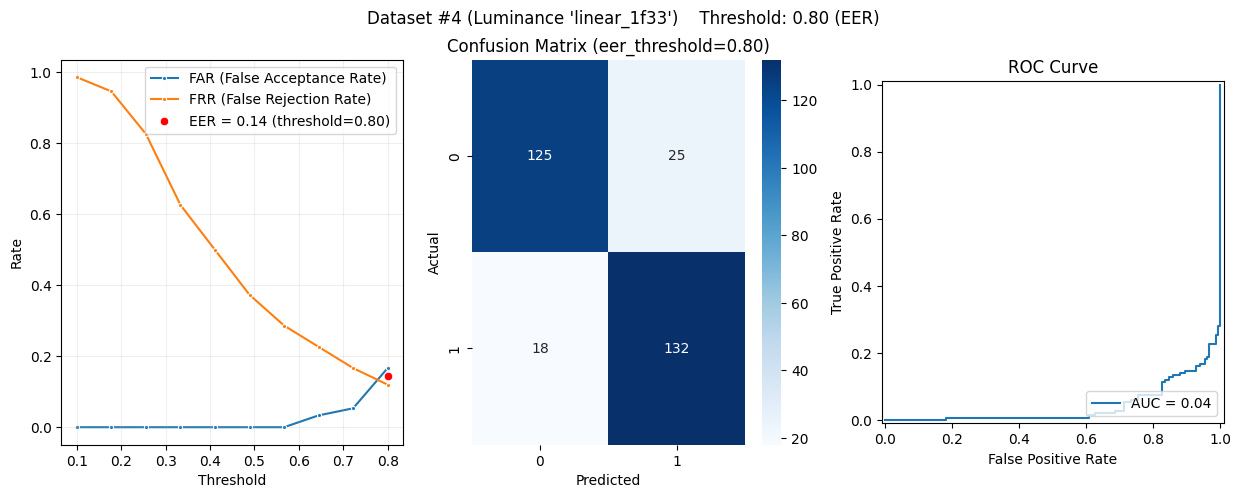

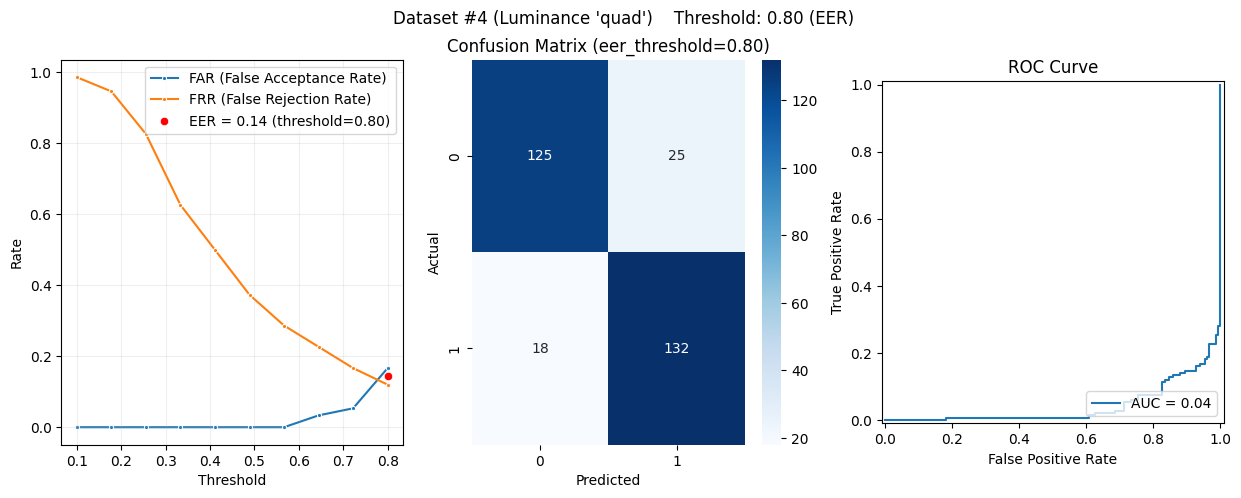

In [27]:
luminance_suffixes = [
    "const_30",
    "const_neg10",
    "const_neg20",
    "const_neg100",
    "linear_0f5",
    "linear_0f6",
    "linear_0f75",
    "linear_1f5",
    "linear_1f33",
    "quad"
]
for lum_suffix in luminance_suffixes:
    df4_wth_fixed_paths = df4.copy()
    df4_wth_fixed_paths["image"] = df4_wth_fixed_paths["image"].apply(lambda x: f"df4_luminance_{lum_suffix}/" + x)
    run_exp(df4_wth_fixed_paths, THRESHOLD_VALUES, dataset_name=f"Dataset #4 (Luminance '{lum_suffix}')")

In [17]:
from brisque import BRISQUE


brisque = BRISQUE(url=False)